## Image Enhancement
<ol>
    <li>Arithmetic Operations like addition, multiplication</li>
    <li>Thresholding and Masking</li>
    <li>Bitwise operation like OR, AND, XOR</li>
</ol>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from IPython.display import Image

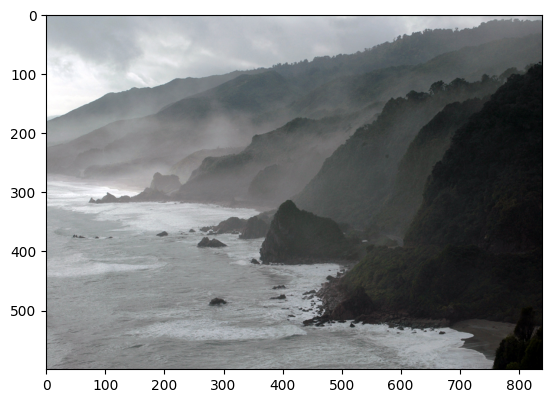

In [2]:
img_bgr = cv2.imread("./NB4/New_Zealand_Coast.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

#### Addition or Brightness
```
cv2.add(img, another_img)
cv2.substract(img, another_img)
```

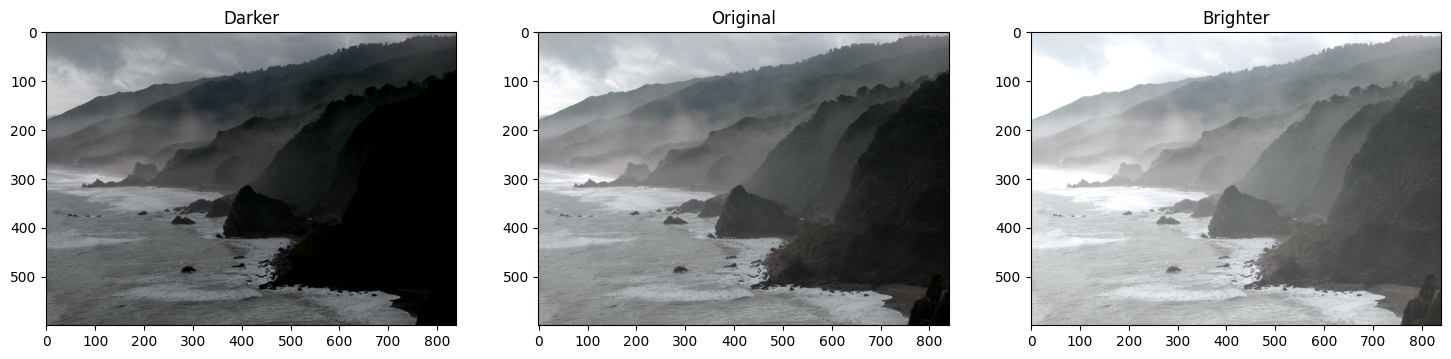

In [3]:
offset = np.ones(img_bgr.shape, dtype='uint8') * 50

bright_img_bgr = cv2.add(img_rgb, offset)
darker_img_bgr = cv2.subtract(img_rgb, offset)

plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(darker_img_bgr); plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original");
plt.subplot(133); plt.imshow(bright_img_bgr); plt.title("Brighter");

#### Multiplying or Contrast
```
cv2.multiply(img, another_img)
```

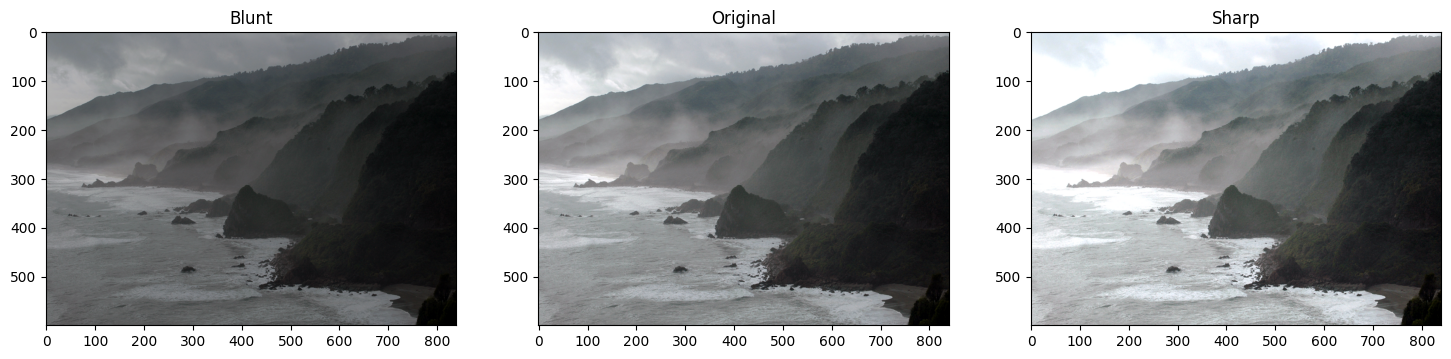

In [4]:
blunt_img = np.ones(img_rgb.shape) * .7
sharp_img = np.ones(img_rgb.shape) * 1.3

blunt_img_rgb = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), blunt_img), 0, 255))
sharp_img_rgb = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), sharp_img), 0, 255))

plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(blunt_img_rgb); plt.title("Blunt");
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original");
plt.subplot(133); plt.imshow(sharp_img_rgb); plt.title("Sharp");

#### Image Thresholding
```
cv2.threshold(src, thresh, maxVal, type[,dst])

cv2.adaptiveThreshold(src, maxValue, adpativeMethod, thresholdType, blockSize, C[, dst])
```

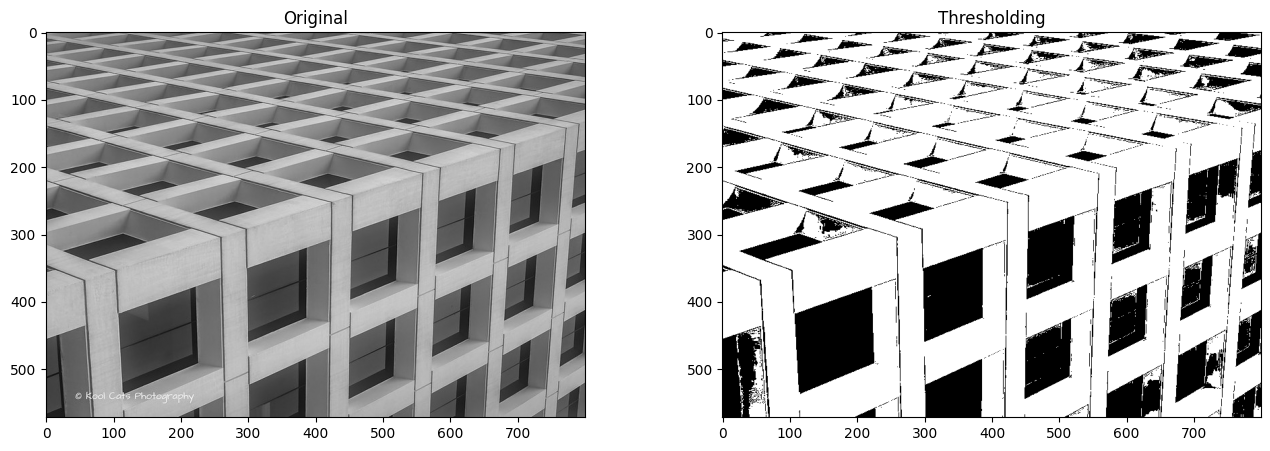

In [5]:
building_img = cv2.imread("./NB4/building-windows.jpg", cv2.IMREAD_GRAYSCALE)

ret, thresold_img = cv2.threshold(building_img, 100, 155, cv2.THRESH_BINARY)

plt.figure(figsize=[16, 5])

plt.subplot(121); plt.imshow(building_img, cmap='gray'); plt.title("Original");
plt.subplot(122); plt.imshow(thresold_img, cmap='gray'); plt.title("Thresholding");

#### Application: Sheet Music Reader

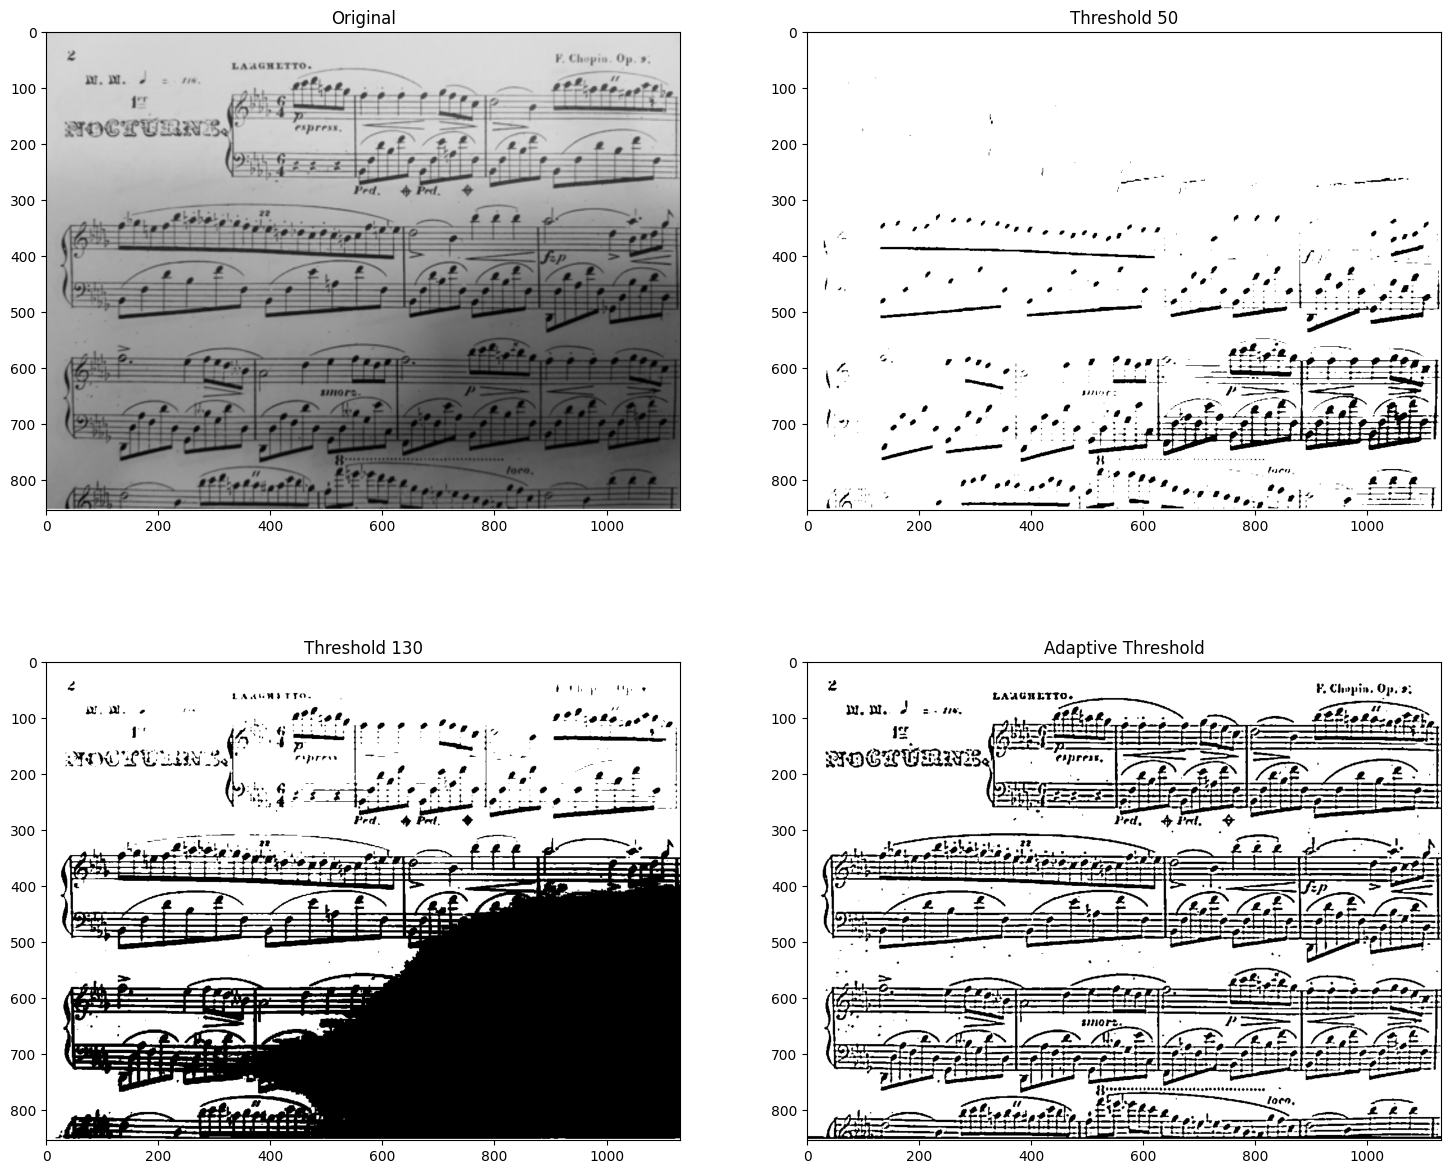

In [6]:
piano_sheet_img = cv2.imread("./NB4/Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

re, piano_lower_thresh = cv2.threshold(piano_sheet_img, 50, 255, cv2.THRESH_BINARY)
re, piano_higher_thresh = cv2.threshold(piano_sheet_img, 130, 255, cv2.THRESH_BINARY)
piano_adaptive_thresh = cv2.adaptiveThreshold(piano_sheet_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

plt.figure(figsize=[18, 15])
plt.subplot(221); plt.imshow(piano_sheet_img, cmap='gray'); plt.title("Original");
plt.subplot(222); plt.imshow(piano_lower_thresh, cmap='gray'); plt.title("Threshold 50");
plt.subplot(223); plt.imshow(piano_higher_thresh, cmap='gray'); plt.title("Threshold 130");
plt.subplot(224); plt.imshow(piano_adaptive_thresh, cmap='gray'); plt.title("Adaptive Threshold");

#### Bitwise Operations
```
cv2.bitwise_and(src1, src2[, dst[, mask]])
cv2.bitwise_or,
cv2.bitwise_xor,
cv2.bitwise_not
```

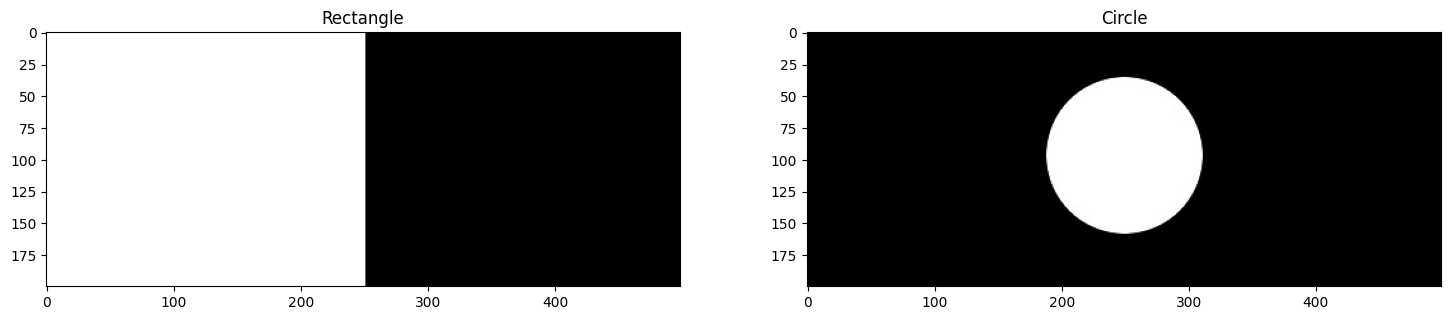

In [7]:
img_rec = cv2.imread("./NB4/rectangle.jpg", cv2.IMREAD_GRAYSCALE)
img_cir = cv2.imread("./NB4/circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[18, 5])

plt.subplot(121); plt.imshow(img_rec, cmap='gray'); plt.title("Rectangle");
plt.subplot(122); plt.imshow(img_cir, cmap='gray'); plt.title("Circle");

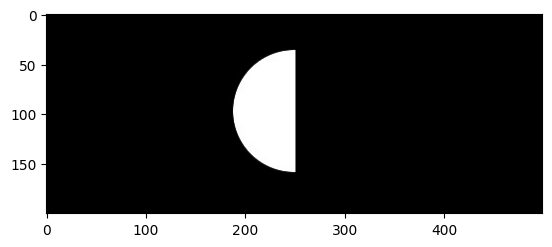

In [8]:
bitwise_and_img = cv2.bitwise_and(img_rec, img_cir)

plt.imshow(bitwise_and_img, cmap='gray')

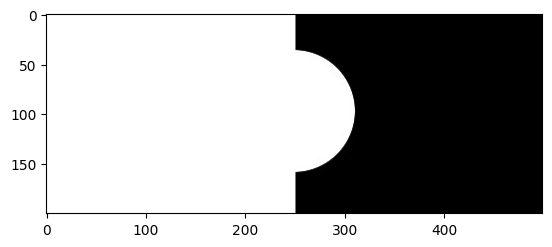

In [9]:
bitwise_or_img = cv2.bitwise_or(img_rec, img_cir, mask = None)
plt.imshow(bitwise_or_img, cmap='gray')

#### Application: Logo Manipulation

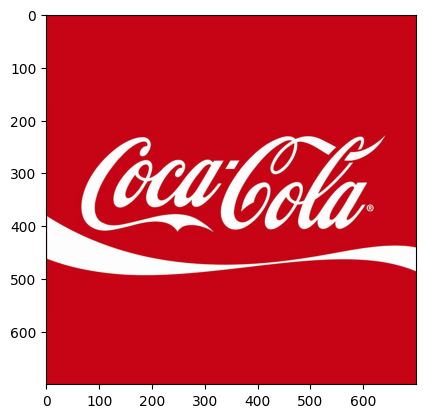

In [10]:
#read forground
img_bgr = cv2.imread("./NB4/coca-cola-logo.png", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

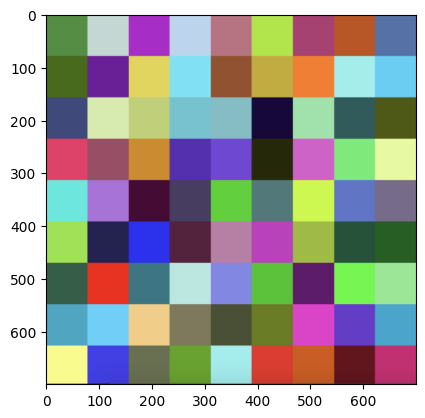

In [15]:
#Read background image and resize it
logo_w, logo_h, dim = img_rgb.shape

background_img = cv2.imread("./NB4/checkerboard_color.png", cv2.IMREAD_COLOR)
background_img_rgb = cv2.cvtColor(background_img, cv2.COLOR_BGR2RGB)

background_img_resize = cv2.resize(background_img_rgb, (logo_w, logo_h), interpolation=cv2.INTER_AREA)

plt.imshow(background_img_resize)

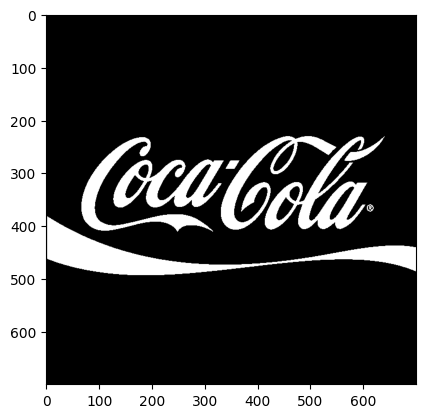

In [16]:
#create image mask
re, img_mask = cv2.threshold(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY), 125, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap='gray')

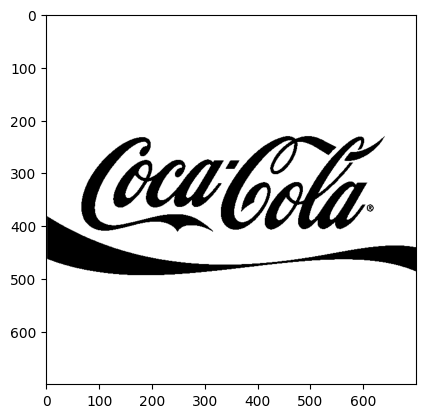

In [17]:
img_inv = cv2.bitwise_not(img_mask)

plt.imshow(img_inv, cmap='gray')

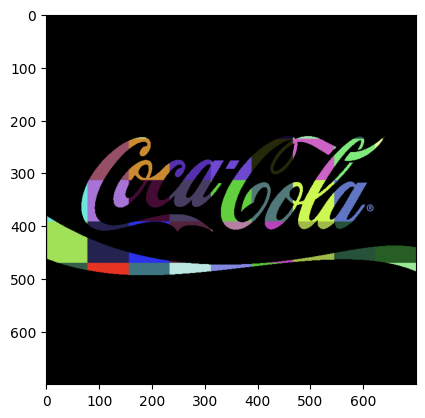

In [18]:
background = cv2.bitwise_and(background_img_resize, background_img_resize, mask=img_mask)

plt.imshow(background)

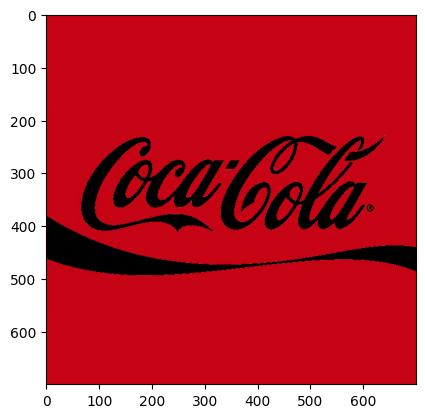

In [19]:
foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_inv)

plt.imshow(foreground)

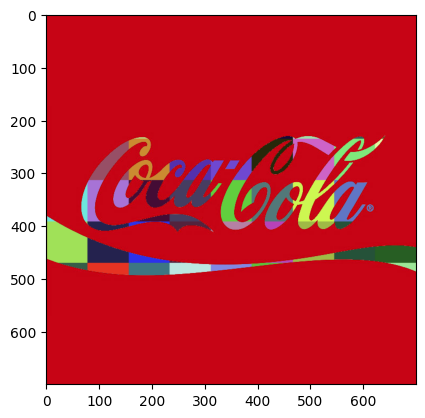

In [20]:
final = foreground + background

plt.imshow(final)